In [21]:
from constants import EXPLANATIONS_PATH
import pickle

with open(f'results4/SVMClassifier.pickle', 'rb') as file:
    explanations = pickle.load(file)

explanations

{'ale0int': {('SVMClassifier',
   "{'degree': 3, 'kernel': 'poly', 'C': 16, 'gamma': 'auto', 'max_iter': 30000}"): intelligence_partner  2.500000   4.000000   5.000000   6.000000   7.000000   \
  intelligence                                                                  
  2.00000                0.004791   0.004791   0.004791   0.004791   0.029701   
  3.00000               -0.039069  -0.039069  -0.039069  -0.039069  -0.014159   
  5.00000               -0.039069  -0.039069  -0.039069  -0.039069  -0.014159   
  6.00000                0.007772   0.007772   0.007772   0.007772   0.032682   
  7.00000                0.043888   0.043888   0.043888   0.043888   0.033083   
  7.70446                0.010554   0.010554   0.010554   0.010554  -0.000250   
  8.00000               -0.001310  -0.001310  -0.001310  -0.001310  -0.012114   
  9.00000               -0.001310  -0.001310  -0.001310  -0.001310  -0.012114   
  10.00000              -0.001310  -0.001310  -0.001310  -0.001310  -0.012114

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from constants import SEED
from data_utils import get_dataset

X, y = get_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=(SEED+1))
BASELINE = np.sum(y == 1) / np.sum(y == 0)

/home/krzaq/xai/XAI-team-project/data_utils.py:20: DtypeWarning: Columns (4,11,12,16,17,18,19,20,40,41,42,43,44,45,52,53,54,55,56,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,108,110) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("SpeedDating.csv", index_col=0)


In [18]:
import constants
import explanation_utils
from importlib import reload
from models import HYPERPARAMETERS, MODELS
reload(constants)
reload(explanation_utils)
from explanation_utils import EXPLANATION_FUNCS2, EXPLANATION_FUNCS3, run_all_explanations
from training_and_selection import get_rashomon_sets

rashomon_sets_params = get_rashomon_sets(
    models=MODELS,
    hyperparameters=HYPERPARAMETERS,
    X=X,
    y=y,
    initial_cutoff=0.15,
    top=0.04,
    initial_time_limit=50,
    cross_validation_time_limit=60,
    initial_path='results/initial_grid_search.csv',
    cross_validation_path='results/cross_validation_results.csv',
)

explanations = run_all_explanations(
    MODELS,
    rashomon_sets_params,
    X_train,
    y_train,
    X_test,
    y_test,
    plot=False,
    path='results2/',
    explanation_funcs=EXPLANATION_FUNCS2
)

SVMClassifier 321
TabRClassifier 293
XGBClassifier 289
SVMClassifier


720it [00:00, 689789.60it/s]


TabRClassifier


288it [00:00, 561058.78it/s]


XGBClassifier


288it [00:00, 588101.05it/s]
48it [00:00, 445412.81it/s]
43it [00:00, 348849.27it/s]
43it [00:00, 440965.95it/s]


Skipping 12 iterations of SVMClassifier


100%|██████████| 13/13 [00:00<00:00, 111733.51it/s]


Skipping 11 iterations of TabRClassifier


100%|██████████| 11/11 [00:00<00:00, 73350.31it/s]


Skipping 11 iterations of XGBClassifier


100%|██████████| 12/12 [00:00<00:00, 86928.58it/s]


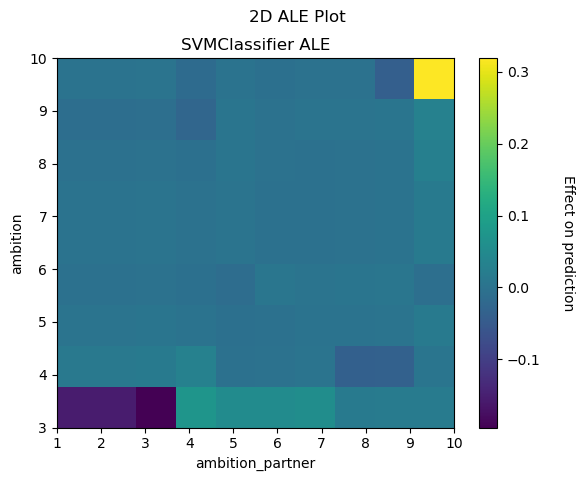

In [33]:
from PyALE._src.ALE_2D import plot_2D_continuous_eff
from matplotlib import pyplot as plt

arg_plot = {
    # "contour": False,
    "fig": None,
    "ax": None,
}

for model_explanations in [explanations]:
    ale_agg = None
    for (model, kwargs), explanation in model_explanations['ale1amb'].items():
        if ale_agg is None:
            ale_agg = explanation
        else:
            ale_agg = ale_agg.add(explanation)

    ale_agg /= len(model_explanations['ale1amb'].keys())
    plot_2D_continuous_eff(ale_agg, **arg_plot)
    plt.title(model + ' ALE')
    plt.show()
    # break
    # break

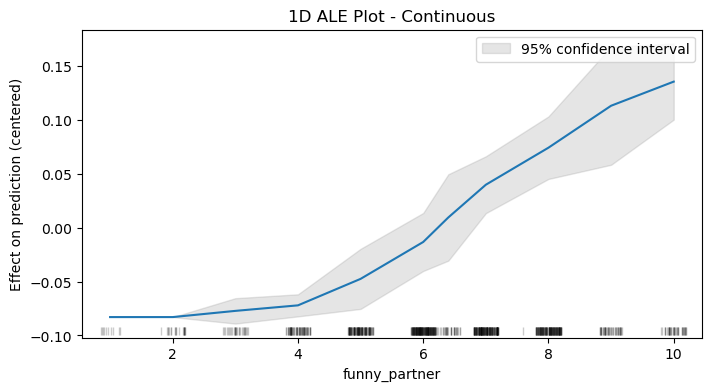

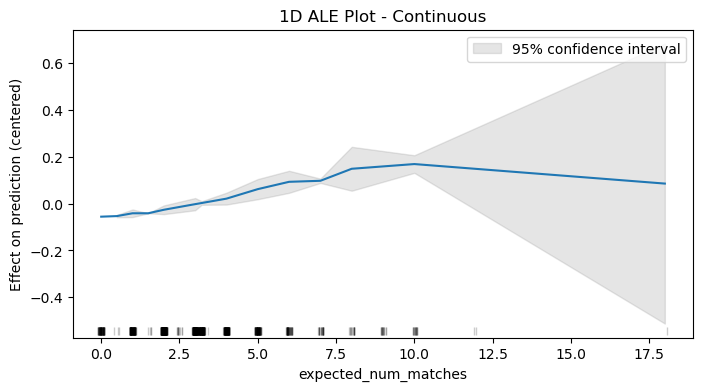

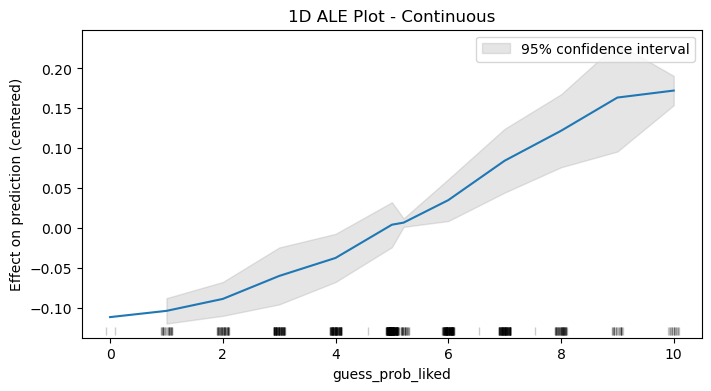

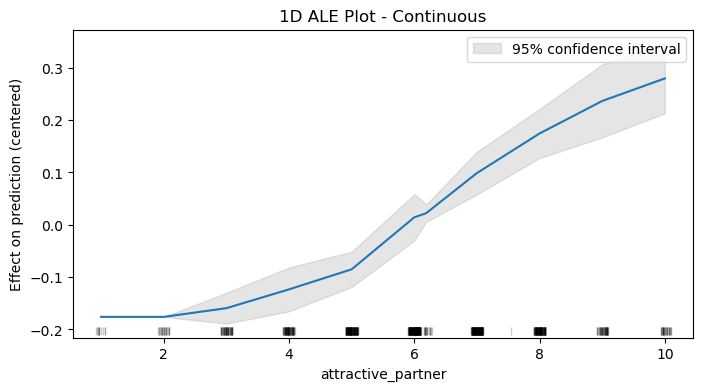

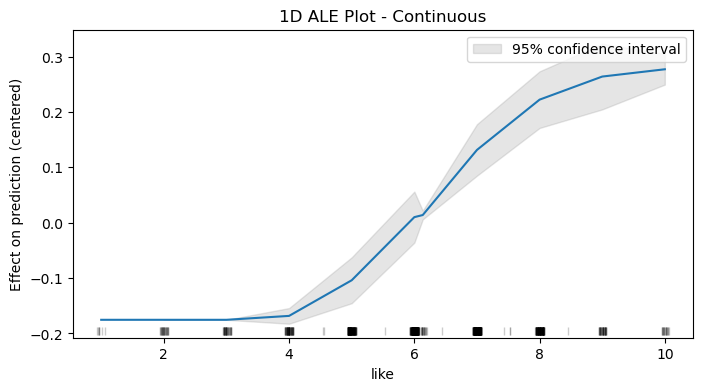

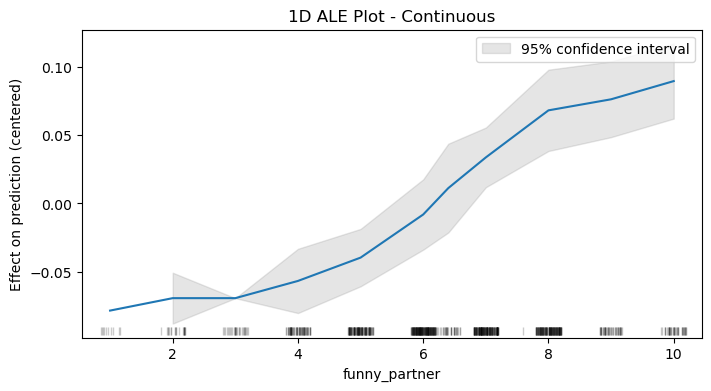

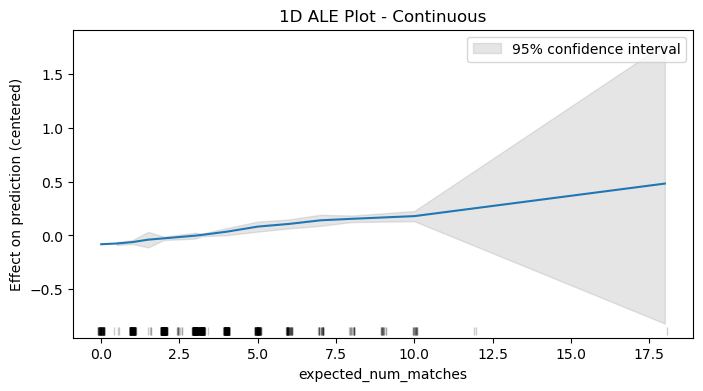

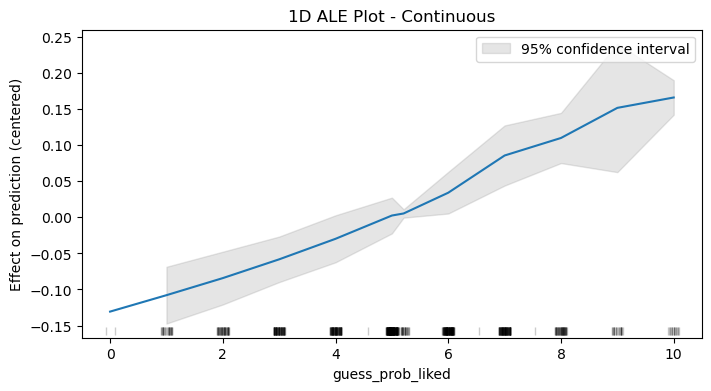

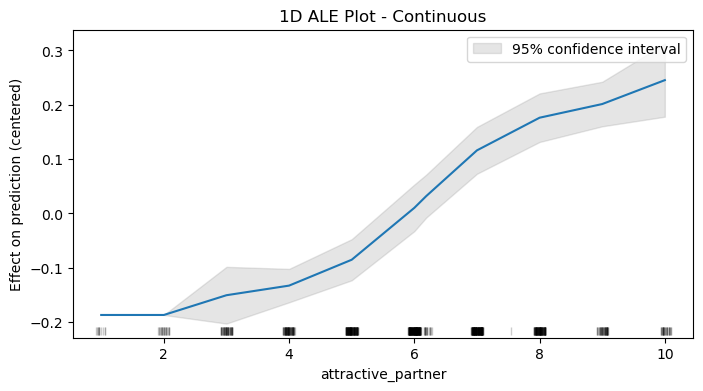

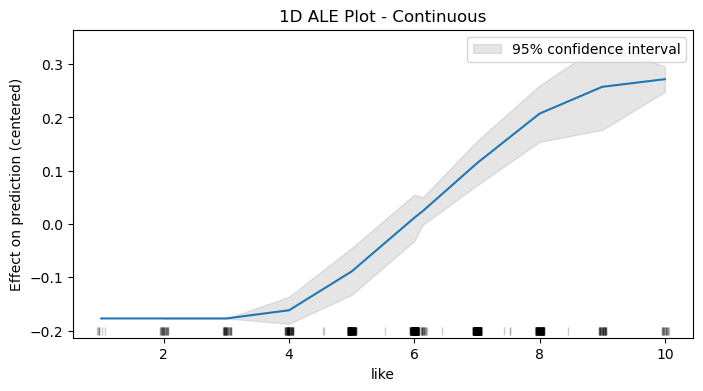

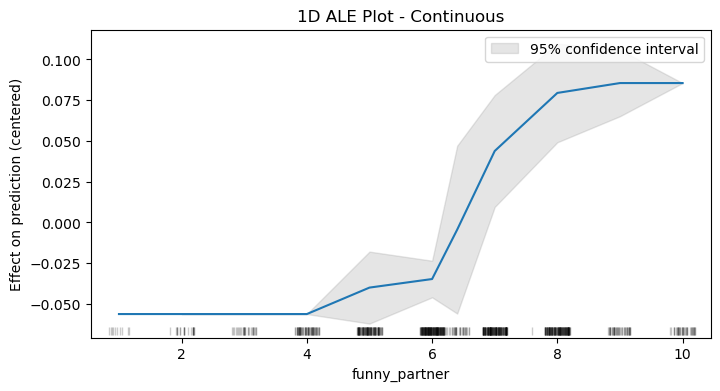

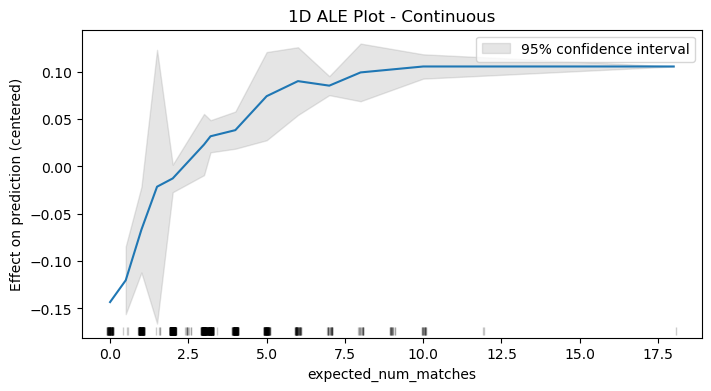

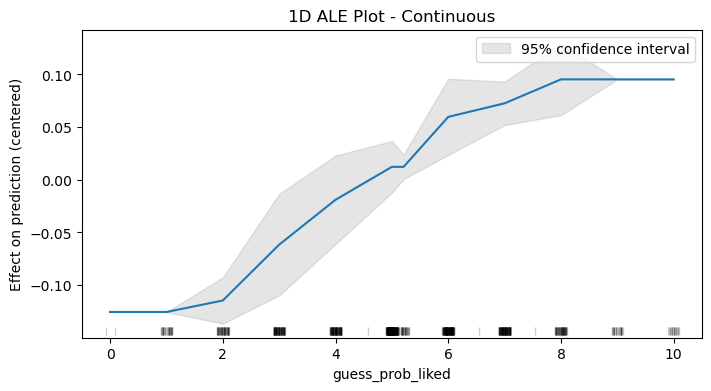

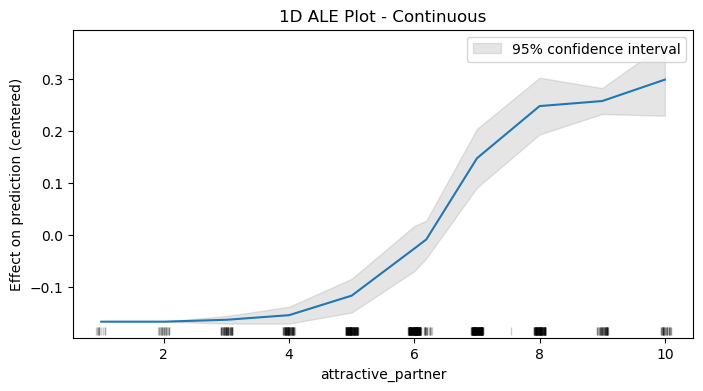

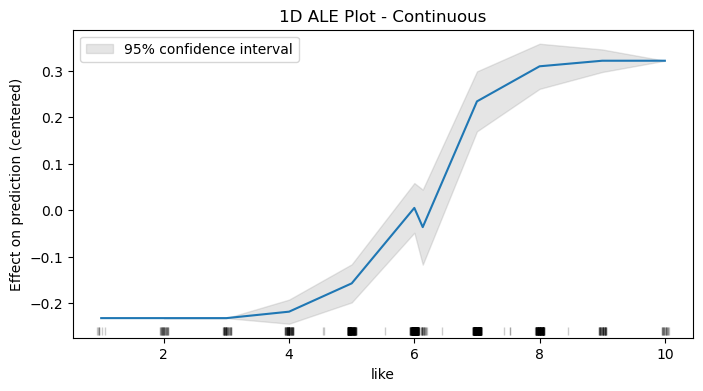

In [19]:
from PyALE._src.ALE_1D import plot_1D_continuous_eff

arg_plot = {
    "X": X_test,
    "fig": None,
    "ax": None,
}

for model_explanations in explanations:
    ale_agg = dict()
    for (model, kwargs), explanation in model_explanations['ale'].items():
        for feature, feature_ale in explanation.items():
            if feature in ale_agg:
                ale_agg[feature] = ale_agg[feature].add(feature_ale)
            else:
                ale_agg[feature] = feature_ale
        # print(ale_agg['like'].iloc[5:7])


    for feature, feature_ale in ale_agg.items():
        # print(feature_ale.shape)
        feature_ale /= len(model_explanations['ale'].keys())
        plot_1D_continuous_eff(feature_ale, **arg_plot)
        # break
    # break
